In [8]:
from google.colab import drive
drive.mount('drive')


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [9]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import sklearn

In [10]:
len(os.listdir('/content/drive/MyDrive/data/Car vs bike'))

2

In [11]:
from posix import listdir #taking data one by one from desired diretory
carpath= os.path.join('/content/drive/MyDrive/data/Car vs bike','Cars')
for img in os.listdir(carpath):
  print(img)

punch-suv-home-mob.jpg
mq7-original-aspect.jpeg
pexels-christian-1164778.jpg
Peel-P50-1962_480x480.jpg
Maruti_Suzuki_Swift_0_1200x768.png
Maruti-Swift-Service-Experience-1200x900.jpg
nexon-exterior-right-front-three-quarter-71.jpeg
masterhead_banner_mobile_01.jpg
nissanz2023-1673297639.jpeg
maruti-s-presso-front-profile-1570429191.jpg
Mahindra-XUV400.jpg
LUXURY-CARS-IN-INDIA-A-Painful-Growth-Motown-India-Bureau-1-989 (2).jpg
Mahindra-Scorpio-N.jpg
kia-carens-left-front-three-quarter0.jpeg
kia_carens_1673783734140_1673783734458_1673783734458.jpeg
Indian-Cars-South-Africa-1.jpeg
Iyer.jpg
m-altroz-home (2).jpg
icoty-2019-maruti-swift-indian-car-of-the-year6-1545371093.jpg
Highest-selling-cars-of-India-in-2018-146757.jpg
Hyundai-Grand-i10-Nios-200120231541.jpg
HD-wallpaper-tata-nexon-ev-electric-cars-2020-cars-crossovers-2020-tata-nexon-ev-indian-cars-tata.jpg
front-left-side-47 (2).jpg
df95d957005a407e9607010fde62f984.jpg
car.jpg
front-left-side-47 (1).jpg
gettyimages-1307086567-170667a.j

In [12]:
#create a single dimession array to put the 3d image
flat_data_arr=[] #source
target_arr=[] #target
catagories=['Cars','Bikes']

In [13]:
datadir= '/content/drive/MyDrive/data/Car vs bike'
for i in  catagories:
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(catagories.index(i))
    print(flat_data_arr, " "  ,target_arr)
  print("loaded")

Streaming output truncated to the last 5000 lines.
       0.06534441]), array([0.29024547, 0.32161802, 0.37259842, ..., 0.06288243, 0.0785687 ,
       0.11386282]), array([0.71856473, 0.79607874, 0.89019641, ..., 0.3041795 , 0.30244486,
       0.15182968]), array([0.91763762, 0.91763762, 0.91763762, ..., 0.61068621, 0.62245092,
       0.65224053]), array([1., 1., 1., ..., 1., 1., 1.]), array([0.72551903, 0.80002883, 0.85493079, ..., 0.49019608, 0.6       ,
       0.65490196]), array([0.08419981, 0.06817421, 0.05148175, ..., 0.37722164, 0.40467262,
       0.44388831]), array([0.70258382, 0.73776391, 0.77307643, ..., 0.15267824, 0.15267824,
       0.15267824]), array([0.27843137, 0.43921569, 0.30588235, ..., 0.27843137, 0.43921569,
       0.30588235]), array([0.95749992, 0.96155932, 0.97231137, ..., 0.64007996, 0.64007996,
       0.6479231 ]), array([0.44597386, 0.42636601, 0.41067974, ..., 0.73030484, 0.73420607,
       0.71462873]), array([0.19253343, 0.09424845, 0.03588713, ..., 0.692

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[array([0.00784314, 0.02745096, 0.04313774, ..., 0.01205045, 0.0117707 ,
       0.01395938]), array([0.52665896, 0.32289613, 0.09907181, ..., 0.54166184, 0.36126955,
       0.12622403]), array([0.98046912, 0.97654755, 0.96870441, ..., 0.00826948, 0.08649157,
       0.09593651]), array([0.02464994, 0.04738838, 0.03664289, ..., 0.72077882, 0.68593965,
       0.67286018]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.6262022 , 0.58257438, 0.36782113, ..., 0.45126584, 0.45518741,
       0.47087368]), array([1., 1., 1., ..., 1., 1., 1.]), array([0.02727085, 0.14035111, 0.30528034, ..., 0.60292885, 0.63640256,
       0.70644722]), array([0.47322405, 0.49903698, 0.50453704, ..., 0.19646811, 0.19466663,
       0.23506634]), array([0.93333333, 0.93333333, 0.93333333, ..., 0.9254902 , 0.9254902 ,
       0.9254902 ]), array([0.73333333, 0.74901961, 0.75294118, ..., 0.1720117 , 0.16809013,
       0.18769797]), array([0.18913032, 0.18913032, 0.18913032, ..., 0.49374858, 0.49374858,
       0.49374

In [14]:
df=pd.DataFrame(flat_data_arr)
df['target']=target_arr
#appended the data into a dataframe

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,target
0,0.007843,0.027451,0.043138,0.007843,0.027451,0.043138,0.007843,0.027451,0.043138,0.007843,...,0.015688,0.011811,0.035308,0.014951,0.011793,0.031159,0.012050,0.011771,0.013959,0
1,0.526659,0.322896,0.099072,0.537898,0.337673,0.110027,0.550329,0.347824,0.119582,0.554240,...,0.542990,0.359449,0.126059,0.544494,0.364001,0.128960,0.541662,0.361270,0.126224,0
2,0.980469,0.976548,0.968704,0.980396,0.976474,0.968631,0.980392,0.976471,0.968628,0.980392,...,0.009974,0.091626,0.100945,0.008378,0.085665,0.096147,0.008269,0.086492,0.095937,0
3,0.024650,0.047388,0.036643,0.023725,0.055397,0.025601,0.013108,0.036843,0.021824,0.015632,...,0.679840,0.648875,0.630990,0.688068,0.648246,0.631126,0.720779,0.685940,0.672860,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
156,0.873604,0.875896,0.874718,0.879256,0.880305,0.879603,0.883909,0.885362,0.884614,0.890614,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
157,0.627780,0.713496,0.846553,0.630886,0.714098,0.847939,0.630487,0.717333,0.849766,0.630511,...,0.342637,0.306822,0.326690,0.336084,0.300256,0.320131,0.328916,0.292797,0.312818,1
158,0.884401,0.900087,0.904009,0.885157,0.900843,0.904765,0.882831,0.898513,0.902491,0.795114,...,0.505784,0.491822,0.505346,0.493712,0.478977,0.491886,0.504727,0.489158,0.501070,1


In [16]:
x=df.iloc[:,:-1].values #all except from 0 index to -2 last column
x

array([[0.00784314, 0.02745096, 0.04313774, ..., 0.01205045, 0.0117707 ,
        0.01395938],
       [0.52665896, 0.32289613, 0.09907181, ..., 0.54166184, 0.36126955,
        0.12622403],
       [0.98046912, 0.97654755, 0.96870441, ..., 0.00826948, 0.08649157,
        0.09593651],
       ...,
       [0.62777952, 0.71349584, 0.84655289, ..., 0.32891621, 0.29279739,
        0.31281758],
       [0.88440109, 0.90008737, 0.90400894, ..., 0.50472672, 0.48915779,
        0.5010703 ],
       [0.36084962, 0.30431137, 0.02682317, ..., 0.53251462, 0.5386861 ,
        0.53303017]])

In [17]:
y=df.iloc[:,-1] #include only values form -1 index column
y

0      0
1      0
2      0
3      0
4      0
      ..
155    1
156    1
157    1
158    1
159    1
Name: target, Length: 160, dtype: int64

In [22]:
# Splitting the data into training set and testset

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 150)
print("Size of training set:", X_train.shape)

print("Size of test set:", X_test.shape)

Size of training set: (112, 67500)
Size of test set: (48, 67500)


In [23]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.79      0.83      0.81        23

    accuracy                           0.81        48
   macro avg       0.81      0.81      0.81        48
weighted avg       0.81      0.81      0.81        48



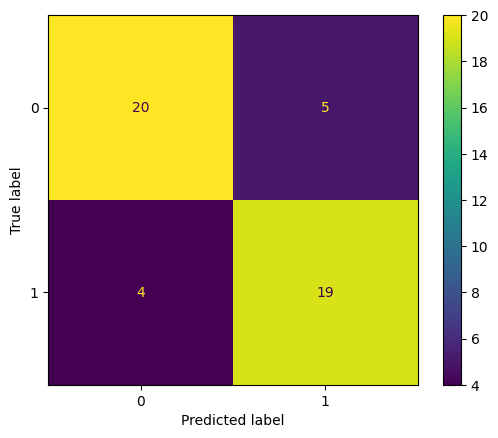

In [24]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [27]:
path='/content/drive/MyDrive/data/Car vs bike/Test/car1.jpeg'
img_array=imread(path)
img_resized=resize(img_array,(150,150,3)).flatten().reshape(1,-1)
p=model.predict(img_resized)
if p==1:
  print("its a bike!!!")
else:
  print("its a car !!!")

its a car !!!


In [29]:
import pickle
#filehandler=open('model.pkl','wb')
pickle.dump(model,open('model.pkl','wb'))